In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold

In [2]:
dataset = pd.read_csv('C:/Users/Abdelrahman tawfik/Desktop/machine-learning-project/code/housepricing/data.csv')

In [3]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
dataset.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
dataset.shape

(4600, 18)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<Axes: >

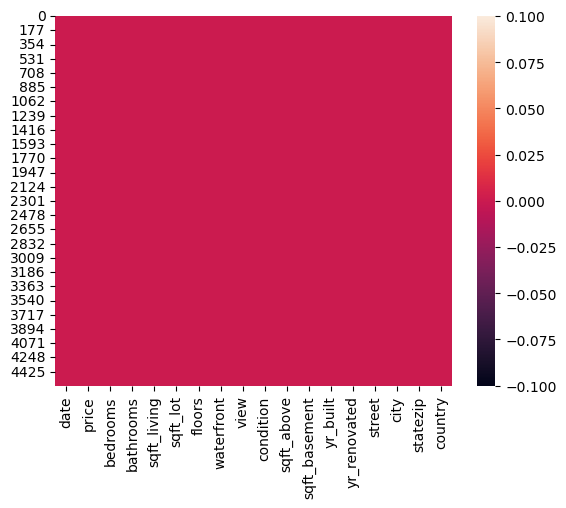

In [9]:
sns.heatmap(dataset.isnull())

In [10]:
dataset.duplicated().sum()

0

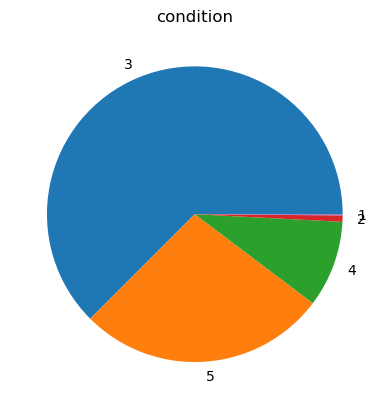

In [11]:
plt.pie(dataset['condition'].value_counts(),labels=dataset['condition'].unique())
plt.title('condition')
plt.show()

In [12]:
dataset['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cities')

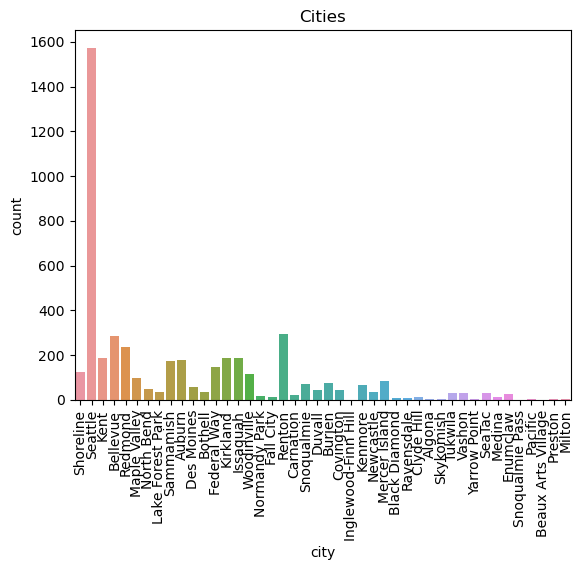

In [13]:
sns.countplot(x='city',data=dataset)
plt.xticks(rotation=90)
plt.title("Cities")

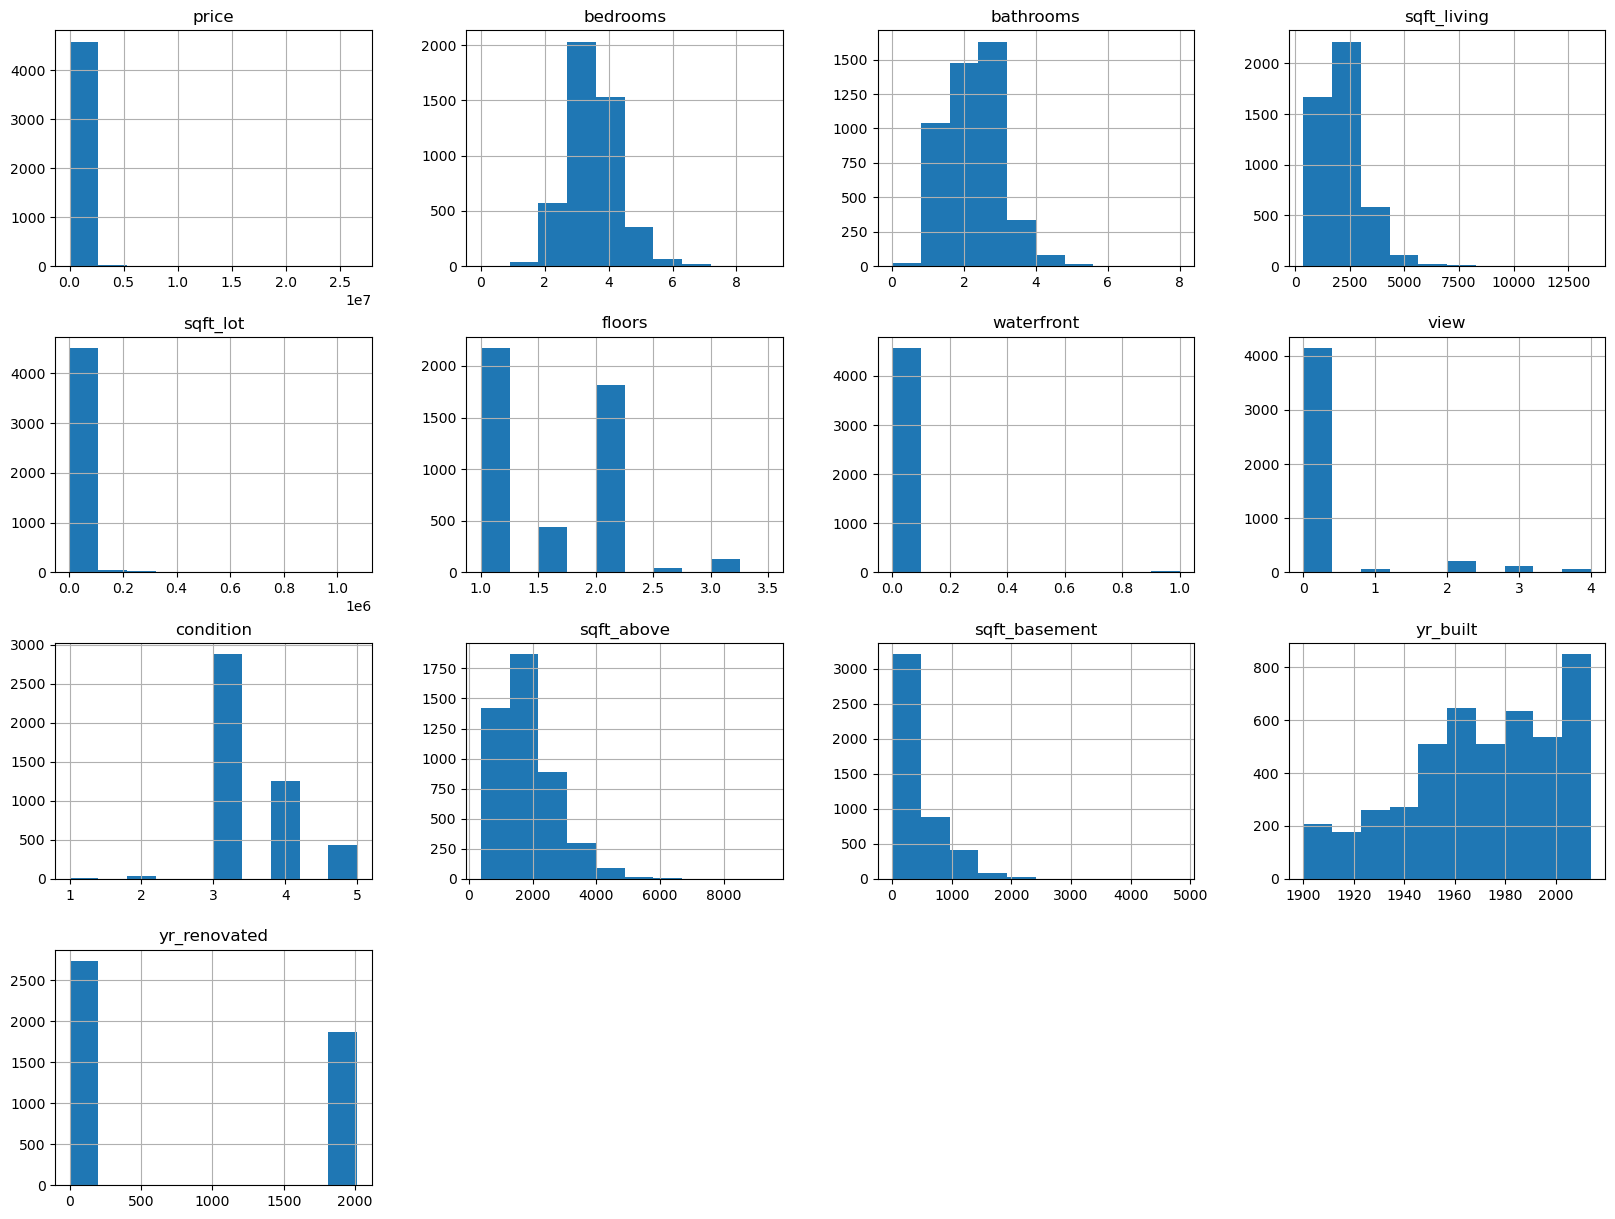

In [14]:
dataset.hist(figsize=(20,15))             
plt.show()

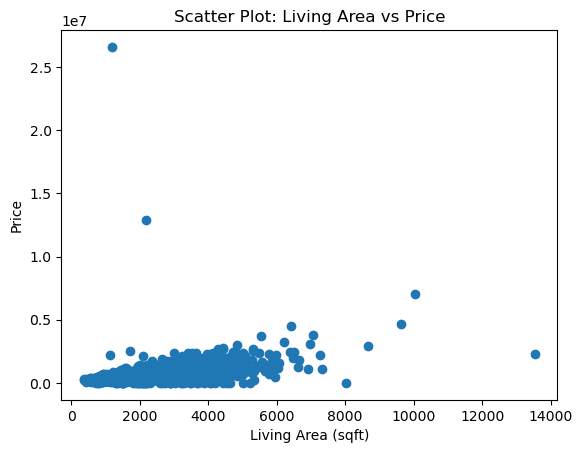

In [15]:
plt.scatter(dataset['sqft_living'], dataset['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Scatter Plot: Living Area vs Price')
plt.show()

E:\Disktop\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\Disktop\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


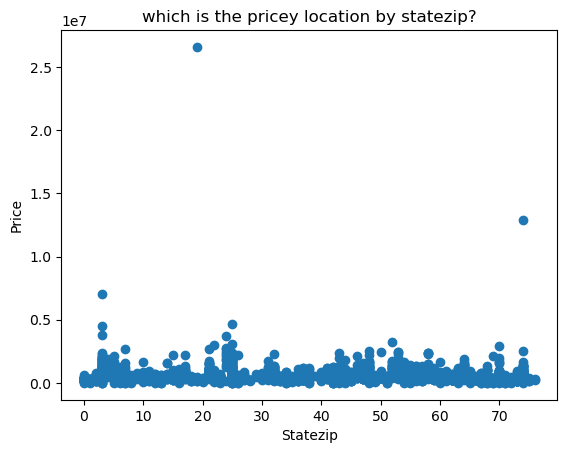

In [16]:
label_encoder = LabelEncoder()
dataset['statezip'] = label_encoder.fit_transform(dataset['statezip'])
plt.scatter(dataset['statezip'],dataset['price'])
plt.xlabel('Statezip')
plt.ylabel('Price')
plt.title("which is the pricey location by statezip?")
plt.show()


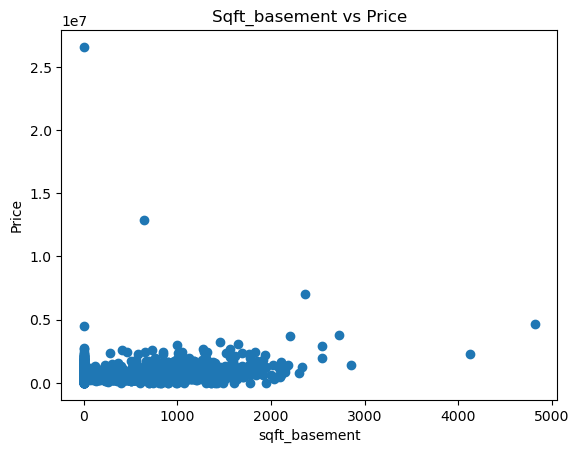

In [17]:
plt.scatter(dataset['sqft_basement'],dataset['price'])
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.title("Sqft_basement vs Price")
plt.show()

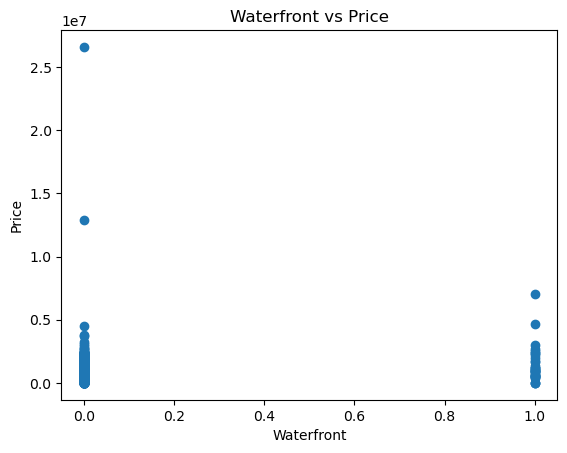

In [18]:
plt.scatter(dataset['waterfront'],dataset['price'])
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title("Waterfront vs Price")
plt.show()

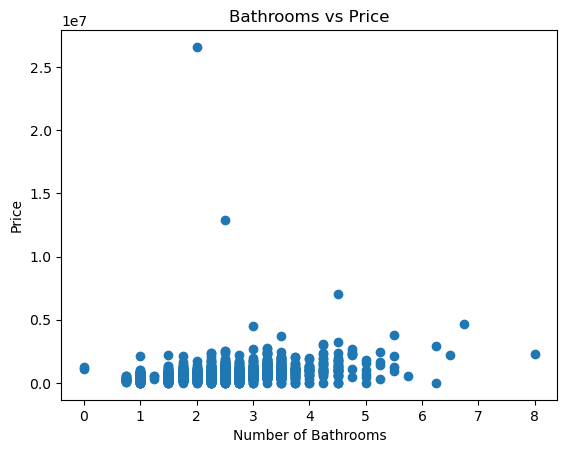

In [19]:
plt.scatter(dataset['bathrooms'],dataset['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title("Bathrooms vs Price")
plt.show()

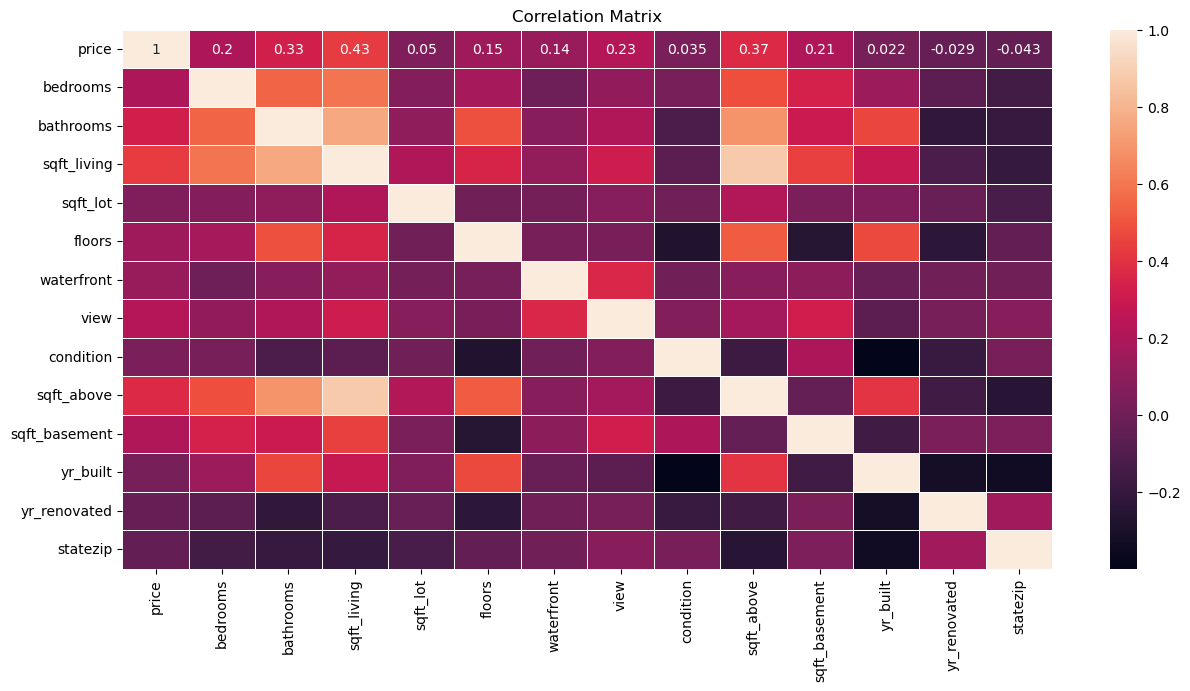

In [20]:
plt.figure(figsize=(15,7))
plt.title('Correlation Matrix')
sns.heatmap(dataset.select_dtypes(include='number').corr(),annot=True,linewidth=.5)
plt.show()

E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Disktop\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

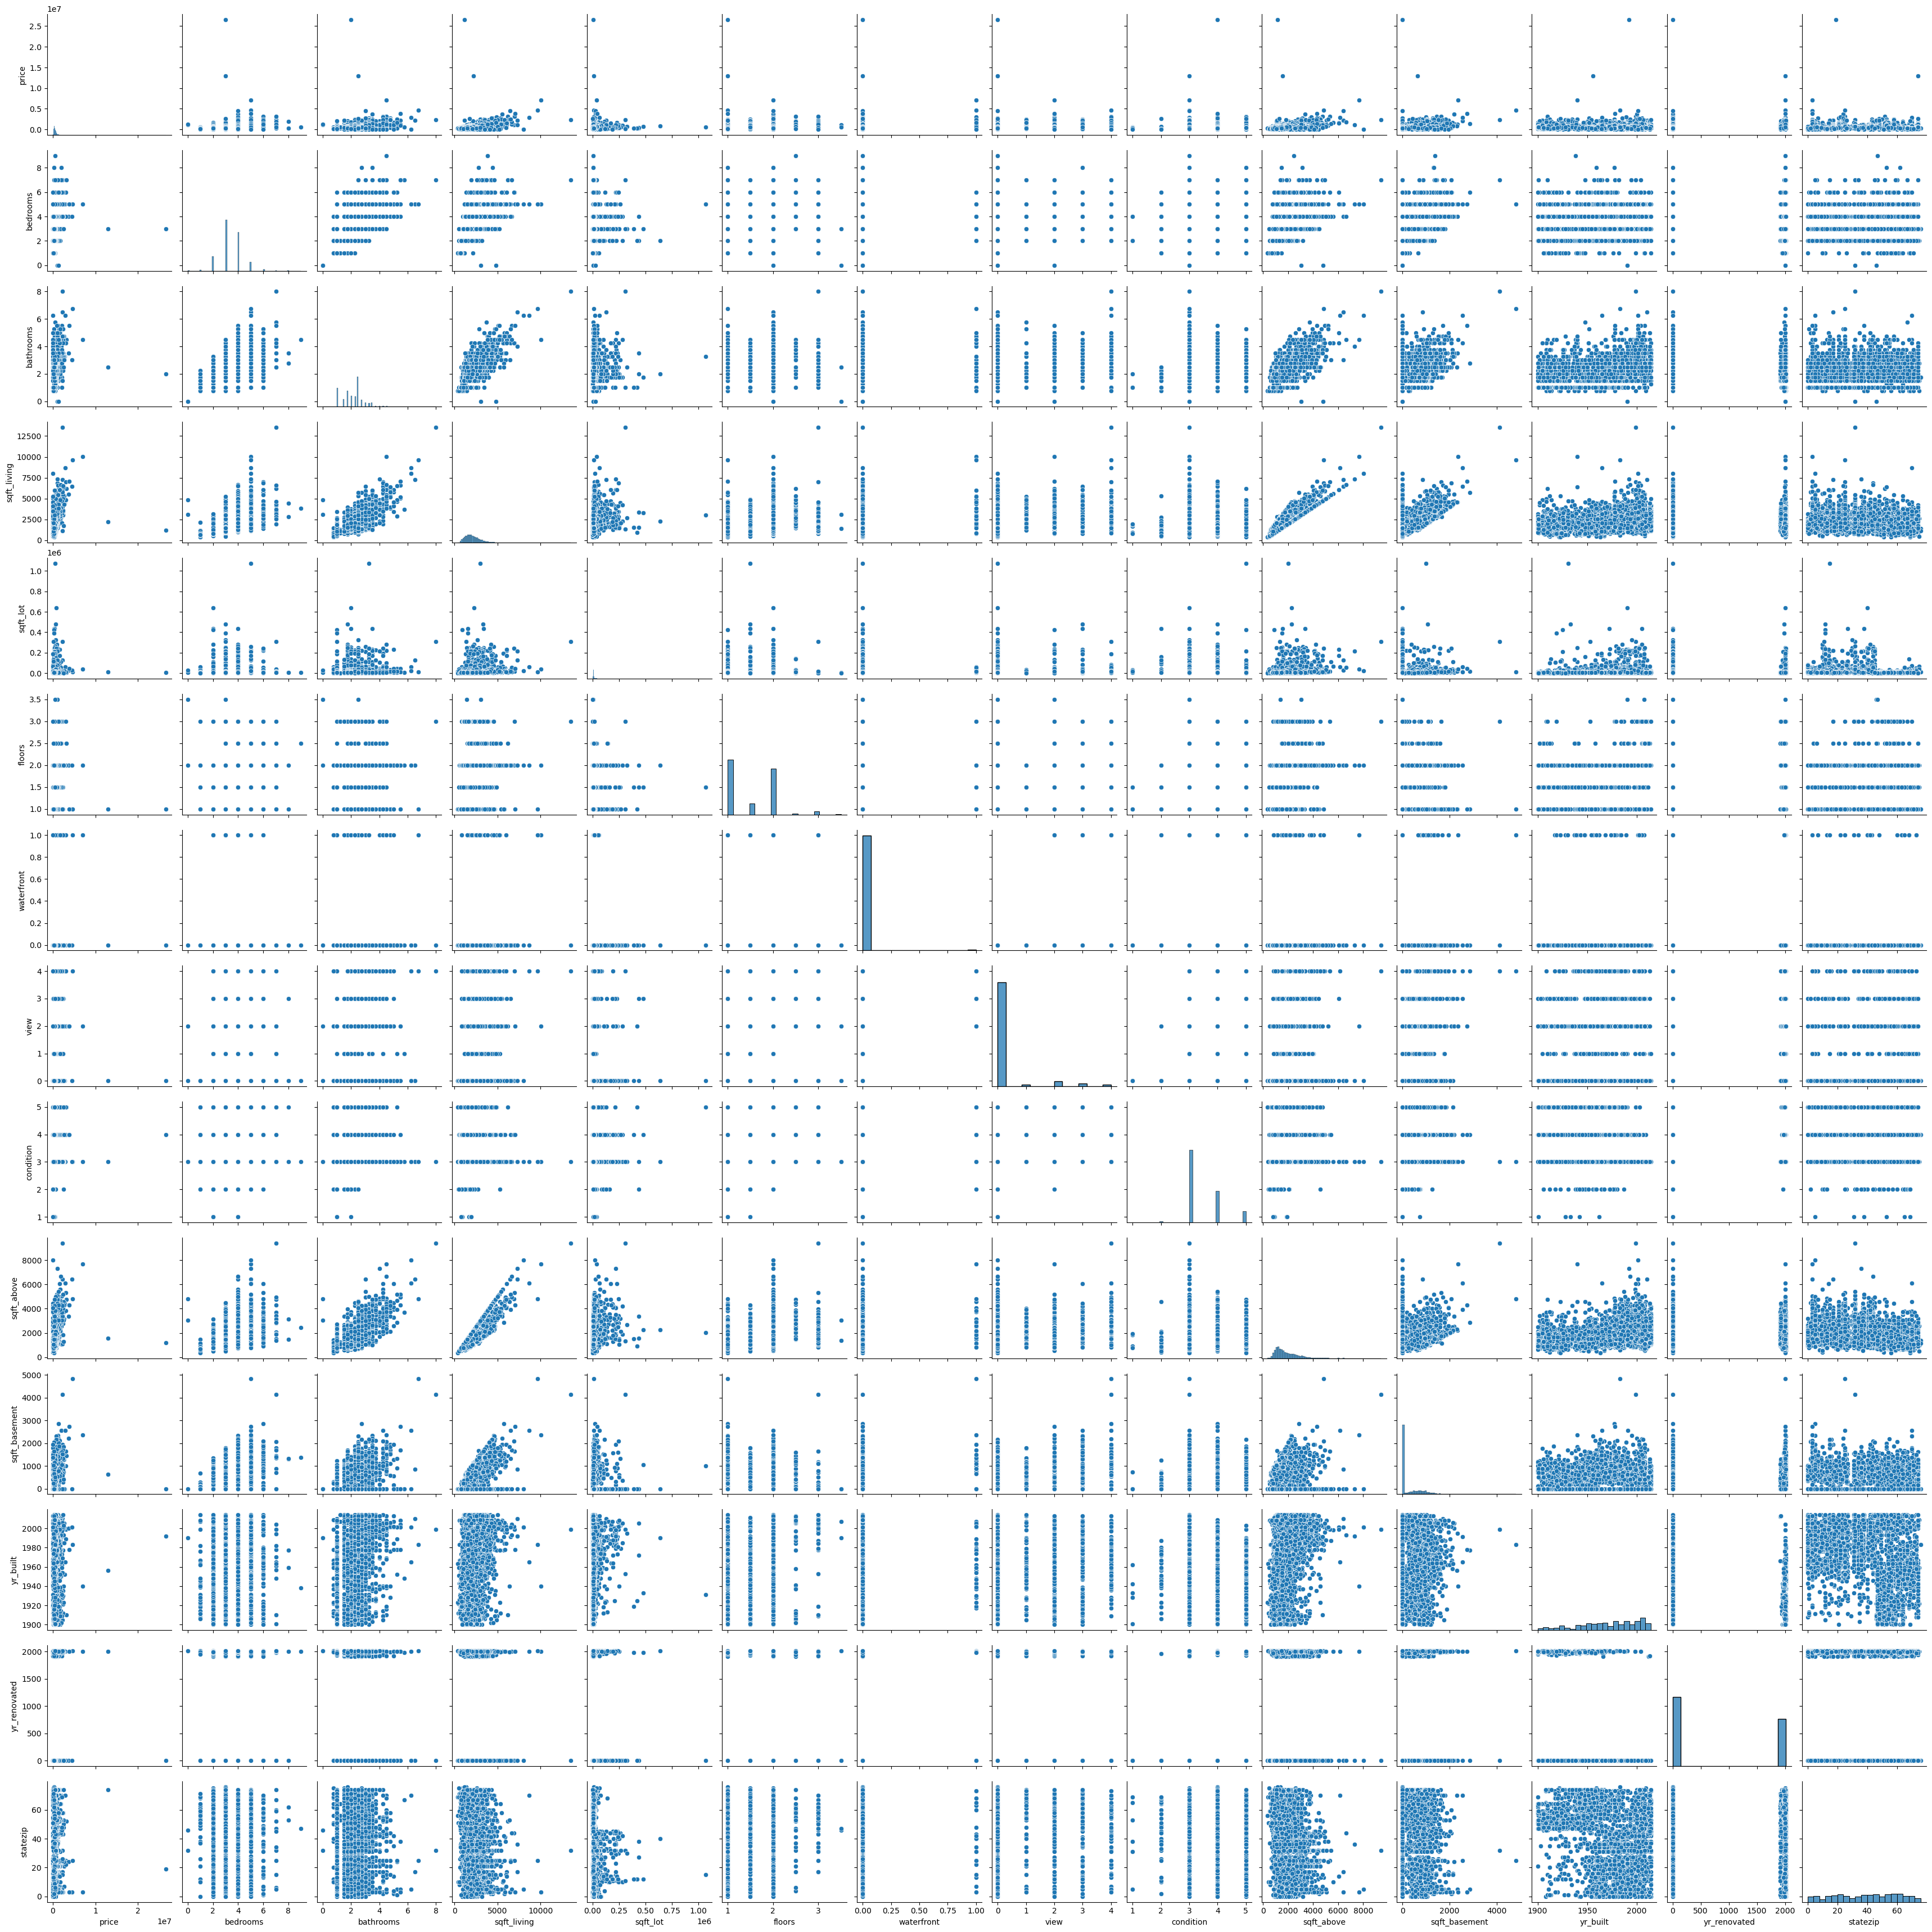

In [21]:
sns.pairplot(dataset)
plt.show()

In [22]:
columns_to_remove = ['date','waterfront','statezip','street','bathrooms']
dataset = dataset.drop(columns=columns_to_remove)

# Removing Outliers for Imporve Predictions

In [23]:
numeric_columns = dataset.select_dtypes(include=['number']).columns.tolist()
z_scores = stats.zscore(dataset[numeric_columns])
threshold = 3
print("Size before removing outliers:", dataset.shape)
outliers_dataset = dataset[(z_scores > threshold).any(axis=1)]
dataset = dataset[(z_scores <= threshold).all(axis=1)]
print("Size after removing outliers:", dataset.shape)

Size before removing outliers: (4600, 13)
Size after removing outliers: (4253, 13)


In [24]:
outliers_dataset.head()

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
1,2384000.0,5.0,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,USA
56,491500.0,4.0,2190,125452,1.0,2,3,2190,0,1968,1997,Auburn,USA
100,736500.0,4.0,3180,21904,2.0,3,3,3180,0,2000,0,Renton,USA
107,1090000.0,4.0,4340,141570,2.5,0,3,4340,0,1992,0,Redmond,USA
118,1030000.0,5.0,3190,16920,1.0,3,3,1690,1500,1976,0,Bellevue,USA


In [25]:
dataset.head()

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,USA
2,342000.0,3.0,1930,11947,1.0,0,4,1930,0,1966,0,Kent,USA
3,420000.0,3.0,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,USA
4,550000.0,4.0,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,USA
5,490000.0,2.0,880,6380,1.0,0,3,880,0,1938,1994,Seattle,USA


# Encoding categorical data

In [26]:
label_encoder = LabelEncoder()

for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = label_encoder.fit_transform(dataset[column])



E:\Disktop\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\Disktop\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\Disktop\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\Disktop\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [27]:
dataset.head()

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1340,7912,1.5,0,3,1340,0,1955,2005,36,0
2,342000.0,3.0,1930,11947,1.0,0,4,1930,0,1966,0,18,0
3,420000.0,3.0,2000,8030,1.0,0,4,1000,1000,1963,0,3,0
4,550000.0,4.0,1940,10500,1.0,0,4,1140,800,1976,1992,31,0
5,490000.0,2.0,880,6380,1.0,0,3,880,0,1938,1994,35,0


# Spilt Data


In [28]:
X=dataset.drop("price",axis=1).values
y=dataset['price'].values

print(X)

[[3.0000e+00 1.3400e+03 7.9120e+03 ... 2.0050e+03 3.6000e+01 0.0000e+00]
 [3.0000e+00 1.9300e+03 1.1947e+04 ... 0.0000e+00 1.8000e+01 0.0000e+00]
 [3.0000e+00 2.0000e+03 8.0300e+03 ... 0.0000e+00 3.0000e+00 0.0000e+00]
 ...
 [3.0000e+00 3.0100e+03 7.0140e+03 ... 0.0000e+00 3.2000e+01 0.0000e+00]
 [4.0000e+00 2.0900e+03 6.6300e+03 ... 0.0000e+00 3.5000e+01 0.0000e+00]
 [3.0000e+00 1.4900e+03 8.1020e+03 ... 0.0000e+00 9.0000e+00 0.0000e+00]]


In [29]:
print(y)

[313000.       342000.       420000.       ... 416904.166667 203400.
 220600.      ]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3402, 12)
(851, 12)
(3402,)
(851,)


In [32]:
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [33]:
print(X_train)
print("________________________________________________________________________")
print(X_test)

[[ 1.9174629   1.87800932 -0.04253667 ... -0.82353519 -1.90915916
   0.        ]
 [ 1.9174629  -0.1102047  -0.07382715 ... -0.82353519 -0.73058398
   0.        ]
 [ 0.75550907 -0.14819605 -0.26916258 ...  1.22402689  0.78472697
   0.        ]
 ...
 [-1.56839858 -1.45256575 -0.40720882 ...  1.2270921   0.78472697
   0.        ]
 [-0.40644475 -1.21195387 -0.21394408 ... -0.82353519  0.78472697
   0.        ]
 [ 0.75550907  0.56097583 -0.49923965 ...  1.22607036  0.44799121
   0.        ]]
________________________________________________________________________
[[-0.40644475 -0.64208361 -0.35482794 ...  1.22096167  0.78472697
   0.        ]
 [ 0.75550907  0.34569151 -0.30459445 ... -0.82353519 -0.81476792
   0.        ]
 [ 1.9174629   2.00464716  0.50543022 ... -0.82353519  0.0270715
   0.        ]
 ...
 [-1.56839858 -0.66741117 -0.30214029 ...  1.22300515  0.78472697
   0.        ]
 [-1.56839858 -0.79151625  2.53087537 ...  1.21993993  1.28983062
   0.        ]
 [-0.40644475  0.77626015 

# Evaluate Model with Cross Validation

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 440273.54273474  498641.54273474  779665.54273474  585745.54273474
  204785.54273474  626705.54273474  389177.54273474  235969.54273474
  386001.54273474  499217.54273474  686225.54273474  427537.54273474
  668049.54273474  648177.54273474  899025.54273474 1072913.54273474
  380145.54273474  357841.54273474  478737.54273474  542497.54273474
  573969.54273474  494865.54273474  697425.54273474  528785.54273474
  472145.54273474  487121.54273474  629649.54273474  413713.54273474
  512273.54273474  197137.54273474  442321.54273474 1120593.54273474
  413329.54273474  395921.54273474  405073.54273474  534289.54273474
  229073.54273474  490065.54273474  750737.54273474  413585.54273474
  543185.54273474  570897.54273474  658641.54273474  709393.54273474
  392657.54273474  368657.54273474  452177.54273474  310161.54273474
  488657.54273474  518161.54273474  291473.54273474  274561.54273474
  671889.54273474  576849.54273474  601745.54273474  318321.54273474
  363345.54273474  805649.54273474

In [36]:
print(y_test)

[ 313950.        570000.        403500.        734990.
  194000.        602761.        352500.        324000.
  395000.        525888.        776000.        250000.
  399000.        402000.       1051000.       1450000.
  351250.        250000.        329950.        629800.
  318000.        453500.        622500.        775000.
  625000.        880000.        500000.        429000.
  613000.        199500.        372000.       1050000.
  365000.        504200.        458000.        487250.
  190000.        275000.        735000.        406100.
  395000.        724800.        561000.        475000.
  310000.        319000.        595000.        330000.
  467000.        345000.        280000.        250000.
  749950.        537500.        672500.        402000.
  522000.        700000.        515000.        429000.
  875000.        197500.        519000.        819900.
  490000.        672500.        285000.        249950.
  450000.        570000.        925000.        246000.
  260000. 

In [37]:
kf = KFold(n_splits=10, shuffle=True, random_state=68)
scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='r2')

In [38]:
print("The RMSE value is",np.abs(scores.mean()))
print("The R square value is",r2_scores.mean())

The RMSE value is 39316727128.348274
The R square value is 0.44804759606874


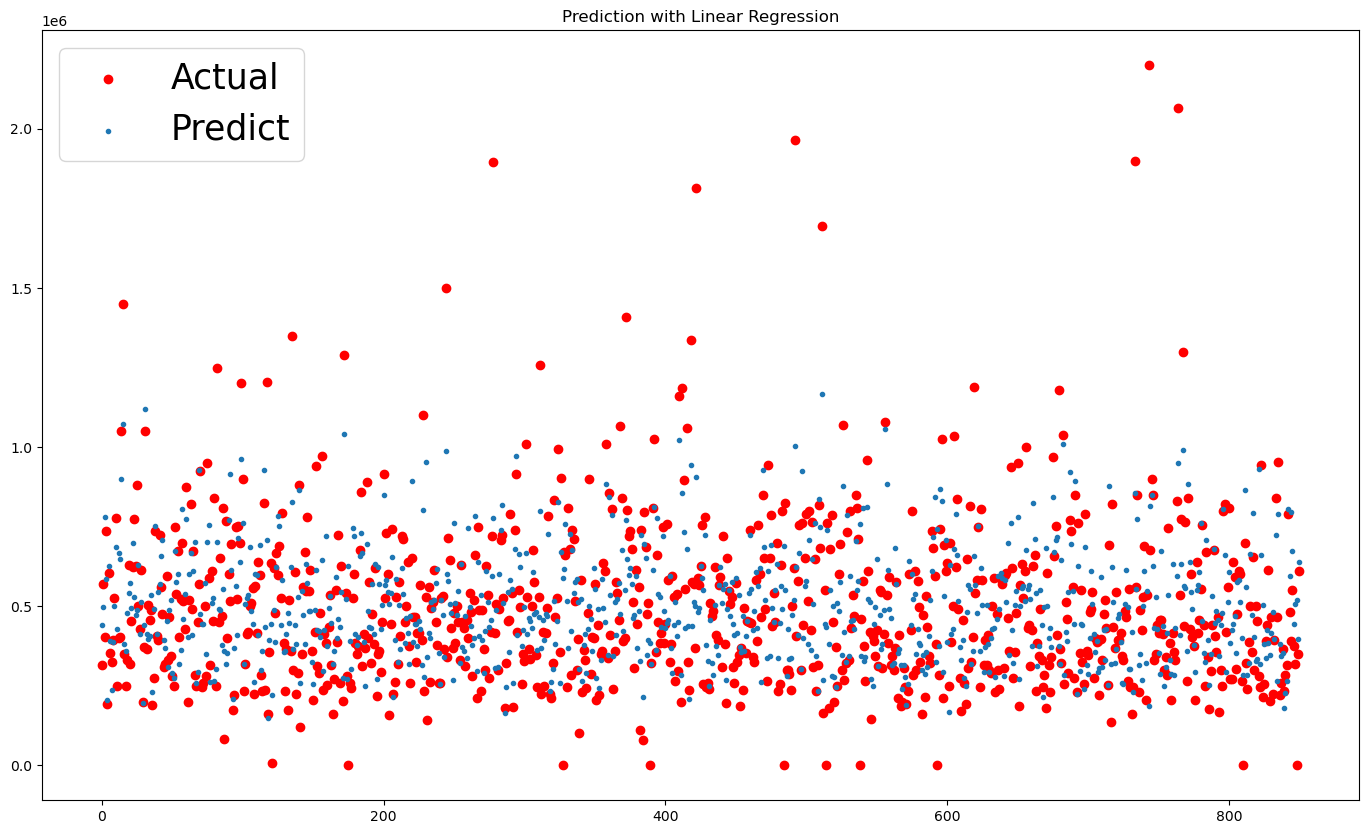

In [39]:
fig = plt.figure(figsize=(17, 10))
plt.title("Prediction with Linear Regression")
plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Actual')
plt.scatter(range(X_test.shape[0]), y_pred, marker='.', label='Predict')
plt.legend(loc=2, prop={'size': 25})
plt.show()

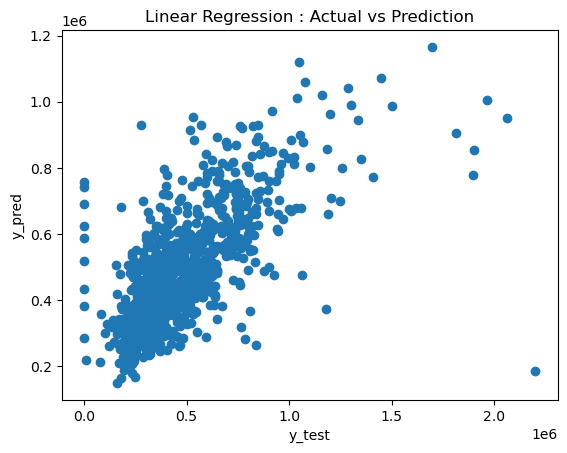

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Linear Regression : Actual vs Prediction")
plt.show()

In [41]:
knn = neighbors.KNeighborsRegressor(n_neighbors=7, weights = 'distance', algorithm = 'ball_tree')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [42]:
y_pred = knn.predict(X_test)
print(y_pred)

[ 472607.50385776  445440.62449469  673842.07820391  579443.12324154
  341929.57817873  607708.38839748  389360.5417019   323252.92721169
  359452.84733462  474994.88108181  617586.38403529  414681.12576925
  563470.36040916  714532.10735835 1086732.65603028 1275326.5455697
  490149.81665688  345766.69257997  441511.08757343  581042.61839033
  467189.86783253  475300.75785247  638608.17534743  444476.55528649
  480327.3703415   500596.38689911  470718.743797    451567.95747178
  481552.98004833  230139.12167421  431639.59255782  684107.62060186
  455828.25893556  433729.41279029  391191.4999088   514199.56965574
  200760.0400052   419701.20222629  830069.25735471  454579.19462069
  476583.51512524  471101.62240829  870755.39453868  656293.54621768
  406113.07325329  380911.52640346  348294.01673568  319873.59922789
  455205.09757134  441764.65553394  339423.69815176  442244.47834333
  523552.48591046  536823.83388474  647839.91639924  377518.74414532
  360249.38820137  700308.1127756  

In [43]:
print(y_test)

[ 313950.        570000.        403500.        734990.
  194000.        602761.        352500.        324000.
  395000.        525888.        776000.        250000.
  399000.        402000.       1051000.       1450000.
  351250.        250000.        329950.        629800.
  318000.        453500.        622500.        775000.
  625000.        880000.        500000.        429000.
  613000.        199500.        372000.       1050000.
  365000.        504200.        458000.        487250.
  190000.        275000.        735000.        406100.
  395000.        724800.        561000.        475000.
  310000.        319000.        595000.        330000.
  467000.        345000.        280000.        250000.
  749950.        537500.        672500.        402000.
  522000.        700000.        515000.        429000.
  875000.        197500.        519000.        819900.
  490000.        672500.        285000.        249950.
  450000.        570000.        925000.        246000.
  260000. 

In [44]:
kf = KFold(n_splits=10, shuffle=True, random_state=68)
scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='r2')

In [45]:
print("The RMSE value is",np.abs(scores.mean()))
print("The R square value is",r2_scores.mean())

The RMSE value is 40205880582.642654
The R square value is 0.4379306581817678


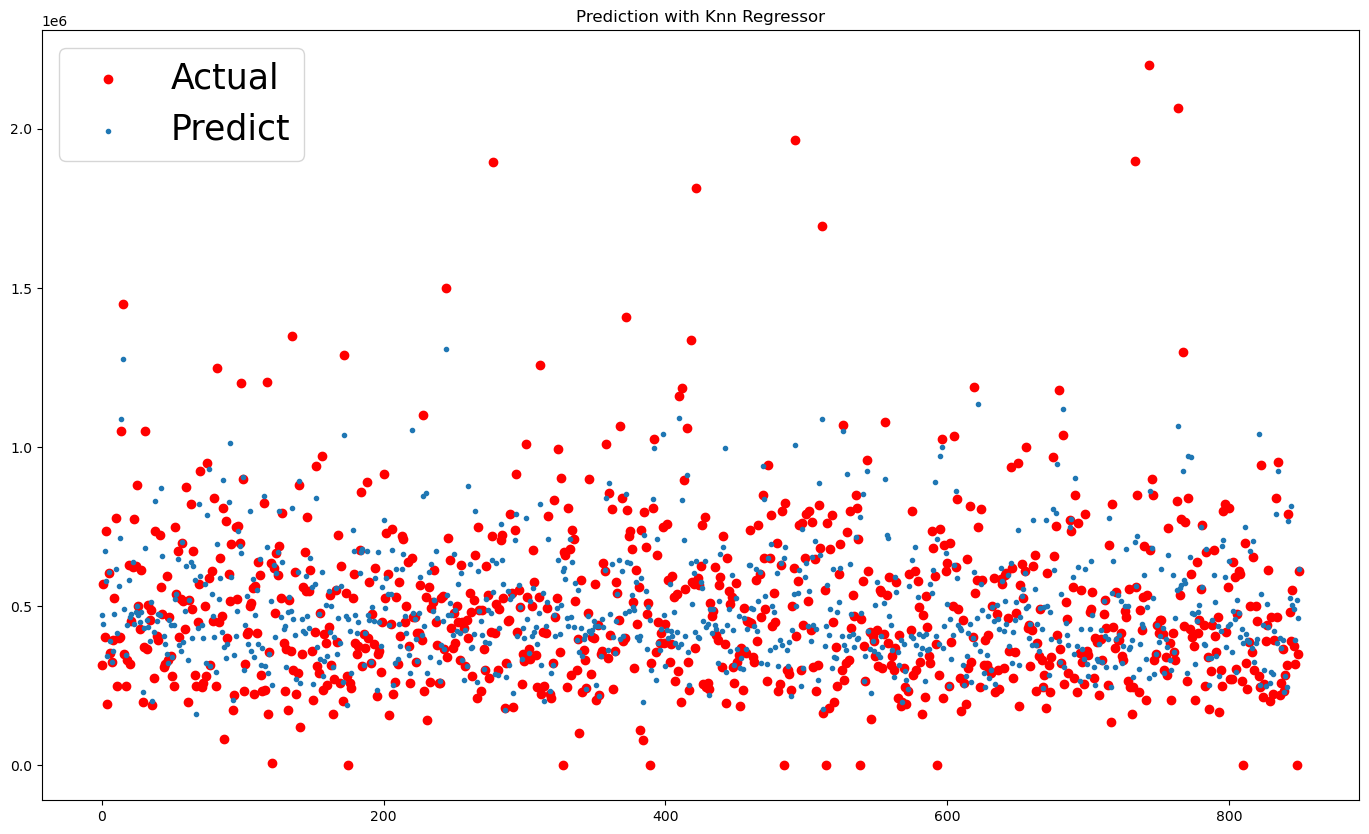

In [46]:
fig = plt.figure(figsize=(17, 10))
plt.title("Prediction with Knn Regressor")
plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Actual')
plt.scatter(range(X_test.shape[0]), y_pred, marker='.', label='Predict')
plt.legend(loc=2, prop={'size': 25})
plt.show()

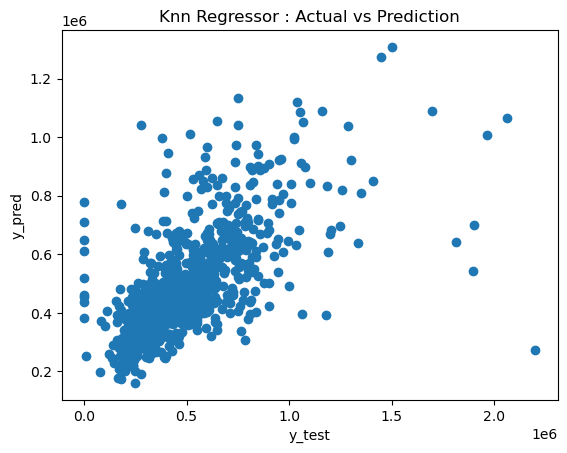

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Knn Regressor : Actual vs Prediction")
plt.show()